<a href="https://colab.research.google.com/github/vk26kumar/OIBSIP/blob/main/CAR_PRICE_PREDICATION_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


NAME-VISHAL KUMAR

DATA SCIENCE PROJECT INTERNSHIP

OASIS  INFOBYTE

TASK 3-**Car Price Prediction with Machine Learning**

DEATILS-The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
data = data.dropna()

In [ ]:
data =data.drop_duplicates()

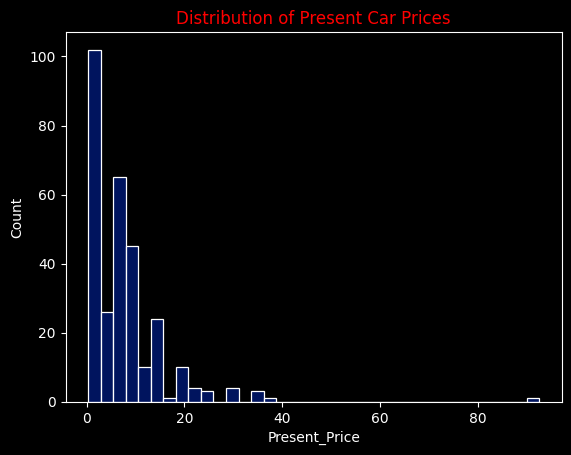

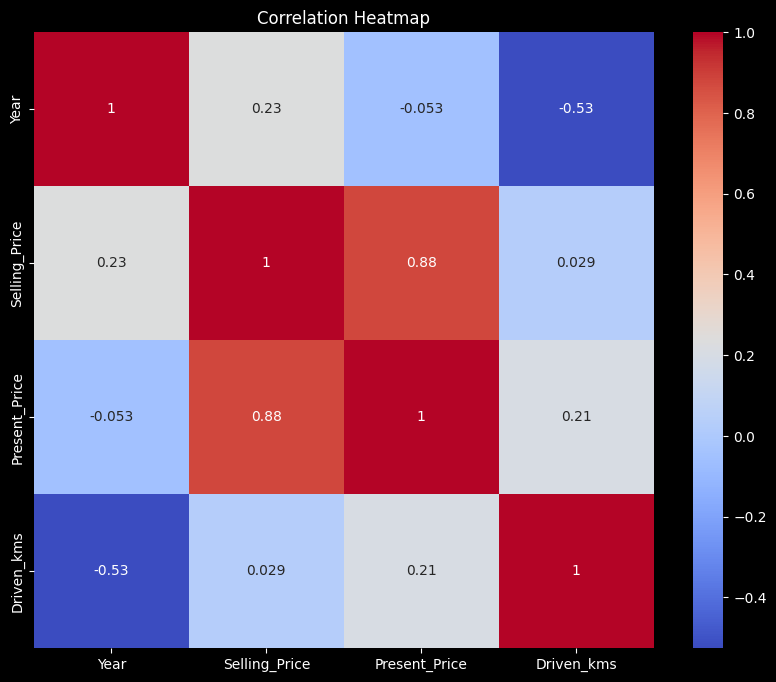

In [ ]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['Present_Price'])
plt.title('Distribution of Present Car Prices',color='red')
plt.xlabel('Present_Price', color='white')
plt.ylabel('Count', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

numeric_features = [ 'Year', 'Selling_Price', 'Present_Price',
               'Driven_kms']
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


In [ ]:
feature_cols =['Car_Name',	'Year',	'Selling_Price','Present_Price',	'Driven_kms',
               'Fuel_Type',	'Selling_type',	'Transmission'	,'Owner']

target_col ='Present_Price'
X = data[feature_cols]
y = data[target_col]

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import xarray

label_encoder = LabelEncoder()
for col in X.columns:
  if X[col].dtype =='object':
    X[col] = label_encoder.fit_transform(X[col])



SPLITTING DATA

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FITTING THE MODEL


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

EVALUATING THE MODEL


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.928185002308249e-11


DEPLOYMENT AND PREDICATION

In [ ]:
import pandas as pd

#Assuming you have a trained model named 'model' and a DataFrame named 'X_train'
#Replace 'model' and 'X_train' with your actual model and training data

new_car_data = [[3, 'gas', 'std', 'two', 'sedan', 'fwd', 'front', 100.0, 180.0,
                 58.0, 56.0, 2500, 'ohc', 'four', 120, 'mpfi', 3.50, 2.80, 8.5,
                 110, 5500, 30, 38]]
feature_cols = ['num_doors', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
                'engine_location', 'wheel_base', 'length', 'width', 'height',
                'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',
                'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
                'peak_rpm', 'city_mpg', 'highway_mpg', 'symboling']

new_car_df = pd.DataFrame(new_car_data, columns=feature_cols)

new_car_encoded = pd.get_dummies(new_car_df, drop_first=True)

#Relapce 'X_train' with your actual training data columns

new_car_encoded = new_car_encoded.reindex(columns=X_train.columns, fill_value=0)

predicted_price = model.predict(new_car_encoded)
predicted_price_positive = abs(predicted_price) # Ensure positive output

print("Predicted Pice", predicted_price_positive)

Predicted Pice [1.28741462e-11]
